In [1]:
import ROOT
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
print('Modules loaded')

Welcome to JupyROOT 6.26/10
Modules loaded


In [2]:
###########################################################
# Global settings:
modelname = 'VLLD_ele'
file_dir = 'input_hists/hist_2018UL_Jul24_signalKinematics'
###########################################################

dict_doublet_ele = {
    'hst_VLLD_ele_M100.root':{'color':'xkcd:blue'},
    'hst_VLLD_ele_M200.root':{'color':'xkcd:green'},
    'hst_VLLD_ele_M400.root':{'color':'xkcd:red'}
}

dict_doublet_mu = {
    'hst_VLLD_mu_M100.root':{'color':'xkcd:blue'},
    'hst_VLLD_mu_M200.root':{'color':'xkcd:green'},
    'hst_VLLD_mu_M400.root':{'color':'xkcd:red'}
}

dict_singlet_ele = {
    'hst_VLLS_ele_M100.root':{'color':'xkcd:blue'},
    'hst_VLLS_ele_M200.root':{'color':'xkcd:green'},
    'hst_VLLS_ele_M400.root':{'color':'xkcd:red'}
}

dict_singlet_mu = {
    'hst_VLLS_mu_M100.root':{'color':'xkcd:blue'},
    'hst_VLLS_mu_M200.root':{'color':'xkcd:green'},
    'hst_VLLS_mu_M400.root':{'color':'xkcd:red'}
}

dict_singlet_tau = {
    'hst_VLLS_tau_M100.root':{'color':'xkcd:blue'},
    'hst_VLLS_tau_M200.root':{'color':'xkcd:green'},
    'hst_VLLS_tau_M400.root':{'color':'xkcd:red'}
}

filedict = None
if   modelname == 'VLLS_ele': filedict = dict_singlet_ele
elif modelname == 'VLLD_ele': filedict = dict_doublet_ele
elif modelname == 'VLLS_mu':  filedict = dict_singlet_mu
elif modelname == 'VLLD_mu':  filedict = dict_doublet_mu
elif modelname == 'VLLS_tau': filedict = dict_singlet_tau

'''
plotdict = {
    'nElectrons': {'rebin': 1, 'xlim': (-1, 10)},
    'allele_pt': {'rebin': 5, 'xlim': (0, 500)},
    'allele_eta': {'rebin': 10, 'xlim': (-4, 4)},
    'allele_phi': {'rebin': 10, 'xlim': (-4, 4)},
    'allele_reliso03': {'rebin': 1, 'xlim': (0, 0.2)},
}'''
plotdict = {
    'diele_m': {'rebin': 5,  'xlim': (0, 400)},
    'dimu_m':  {'rebin': 5,  'xlim': (0, 400)},
    'dijet_m': {'rebin': 5,  'xlim': (0, 400)}
}

print('Settings loaded.')

datestamp = datetime.today().strftime('%Y-%m-%d')
plotdir = 'kinematics_plots/'+datestamp+'/'+modelname
os.system(f'mkdir -p {plotdir}')
print('Plot directory ready!')

Settings loaded.
Plot directory ready!


In [3]:
run_cell = True

if run_cell:
    plotdict = {
        'nElectrons':      {'rebin': 1,  'xlim': (-1, 10)},
        'allele_pt':       {'rebin': 10, 'xlim': (0, 500)},
        'allele_eta':      {'rebin': 10, 'xlim': (-4, 4)},
        'allele_phi':      {'rebin': 10, 'xlim': (-4, 4)},
        'allele_reliso03': {'rebin': 1,  'xlim': (0, 0.2)},
        
        'nMuons':          {'rebin': 1,  'xlim': (0, 10)},
        'allmu_pt':        {'rebin': 10, 'xlim': (0, 500)},
        'allmu_eta':       {'rebin': 10, 'xlim': (-4, 4)},
        'allmu_phi':       {'rebin': 10, 'xlim': (-4, 4)},
        'allmu_reliso03':  {'rebin': 1,  'xlim': (0, 0.2)},
        
        'nJets':           {'rebin': 1,  'xlim': (0, 10)},
        'alljet_pt':       {'rebin': 10, 'xlim': (0, 500)},
        'alljet_eta':      {'rebin': 10, 'xlim': (-4, 4)},
        'alljet_phi':      {'rebin': 10, 'xlim': (-4, 4)},
        
        'nbJets':          {'rebin': 1,  'xlim': (0, 10)},
        'allbjet_pt':      {'rebin': 10, 'xlim': (0, 500)},
        'allbjet_eta':     {'rebin': 10, 'xlim': (-4, 4)},
        'allbjet_phi':     {'rebin': 10, 'xlim': (-4, 4)},
        
        'ele0_pt': {'rebin': 10, 'xlim': (0, 1000)},
        'ele1_pt': {'rebin': 10, 'xlim': (0, 1000)},
        'ele2_pt': {'rebin': 10, 'xlim': (0, 1000)},
        
        'mu0_pt':  {'rebin': 10, 'xlim': (0, 1000)},
        'mu1_pt':  {'rebin': 10, 'xlim': (0, 1000)},
        'mu2_pt':  {'rebin': 10, 'xlim': (0, 1000)},
        
        'jet0_pt': {'rebin': 10, 'xlim': (0, 1000)},
        'jet1_pt': {'rebin': 10, 'xlim': (0, 1000)},
        'jet2_pt': {'rebin': 10, 'xlim': (0, 1000)},
        
        'bjet0_pt':{'rebin': 10, 'xlim': (0, 1000)},
        'bjet1_pt':{'rebin': 10, 'xlim': (0, 1000)},
        'bjet2_pt':{'rebin': 10, 'xlim': (0, 1000)},
        
        'ele0_mt': {'rebin': 10, 'xlim': (0, 1000)},
        'ele1_mt': {'rebin': 10, 'xlim': (0, 1000)},
        'ele2_mt': {'rebin': 10, 'xlim': (0, 1000)},
        
        'mu0_mt':  {'rebin': 10, 'xlim': (0, 1000)},
        'mu1_mt':  {'rebin': 10, 'xlim': (0, 1000)},
        'mu2_mt':  {'rebin': 10, 'xlim': (0, 1000)},
        
        'jet0_mt': {'rebin': 10, 'xlim': (0, 1000)},
        'jet1_mt': {'rebin': 10, 'xlim': (0, 1000)},
        'jet2_mt': {'rebin': 10, 'xlim': (0, 1000)},
        
        'diele_pt': {'rebin': 10, 'xlim': (0, 1000)},
        'diele_eta':{'rebin': 10, 'xlim': (-4, 4)},
        'diele_phi':{'rebin': 10, 'xlim': (-4, 4)},
        'diele_m':  {'rebin': 5,  'xlim': (0, 400)},
        'diele_mt': {'rebin': 10, 'xlim': (0, 1000)},
        
        'dimu_pt':  {'rebin': 10, 'xlim': (0, 1000)},
        'dimu_eta': {'rebin': 10, 'xlim': (-4, 4)},
        'dimu_phi': {'rebin': 10, 'xlim': (-4, 4)},
        'dimu_m':   {'rebin': 5,  'xlim': (0, 400)},
        'dimu_mt':  {'rebin': 10, 'xlim': (0, 1000)},
        
        'dijet_pt': {'rebin': 10, 'xlim': (0, 1000)},
        'dijet_eta':{'rebin': 10, 'xlim': (-4, 4)},
        'dijet_phi':{'rebin': 10, 'xlim': (-4, 4)},
        'dijet_m':  {'rebin': 5,  'xlim': (0, 400)},
        'dijet_mt': {'rebin': 10, 'xlim': (0, 1000)},
        
        'dphi_ele0_ele1': {'rebin': 10, 'xlim': (0, 6)},
        'dphi_mu0_mu1':   {'rebin': 10, 'xlim': (0, 6)},
        'dphi_jet0_jet1': {'rebin': 10, 'xlim': (0, 6)},
        'dr_ele0_ele1':   {'rebin': 10, 'xlim': (0, 6)},
        'dr_mu0_mu1':     {'rebin': 10, 'xlim': (0, 6)},
        'dr_jet0_jet1':   {'rebin': 10, 'xlim': (0, 6)},
        
        'met_pt':  {'rebin': 10, 'xlim': (0, 1000)},
        'met_phi': {'rebin': 10, 'xlim': (-4, 4)}
    }
    
    '''
        'genPart_pdgId_all': {'rebin': 10, 'xlim': (-1000, 1000)},
        'nvll': {'rebin': 1, 'xlim': (0, 10)},
        'allvll_pt': {'rebin': 5, 'xlim': (0, 1000)},
        'allvll_eta': {'rebin': 10, 'xlim': (-4, 4)},
        'allvll_phi': {'rebin': 10, 'xlim': (-4, 4)},
        'allvll_mass': {'rebin': 10, 'xlim': (0, 2500)},
        'allvll_pdgid': {'rebin': 10, 'xlim': (-20, 20)},
        'allvll_decay': {'rebin': 1, 'xlim': (0, 5)},
        'allvll_daughers': {'rebin': 10, 'xlim': (-50, 50)},
        'nvlnu': {'rebin': 1, 'xlim': (0, 10)},
        'allvlnu_pt': {'rebin': 5, 'xlim': (0, 1000)},
        'allvlnu_eta': {'rebin': 10, 'xlim': (-4, 4)},
        'allvlnu_phi': {'rebin': 10, 'xlim': (-4, 4)},
        'allvlnu_mass': {'rebin': 10, 'xlim': (0, 2500)},
        'allvlnu_pdgid': {'rebin': 10, 'xlim': (-20, 20)},
        'allvlnu_decay': {'rebin': 1, 'xlim': (0, 5)},
        'allvlnu_daughers': {'rebin': 10, 'xlim': (-50, 50)},
    '''
    print('Plot dictionary loaded.')

else: print('Skipping cell.')

Plot dictionary loaded.


### Preparing the dictionary containing the histograms as numpy arrays

In [4]:
ymax = 0

for plot_name, settings in plotdict.items():
    for file_name, attributes in filedict.items():
        file_path = os.path.join('', file_dir, file_name)
        
        #Accessing the file
        tfile = ROOT.TFile.Open(file_path)
        if not tfile:
            print(f"Could not open file: {file_path}")
            continue

        #Cheching contents:
        keys = tfile.GetListOfKeys()
        #for key in keys: print(key.GetName())

        #Aceessing the histogram
        found_histogram = False
        for key in keys:
            name = key.GetName()
            if name.startswith(plot_name):
                hist = tfile.Get(name)
                if hist:
                    hist.Rebin(settings['rebin'])
                    if hist.Integral() > 0: hist.Scale(1.0/hist.Integral())
                    
                    # Convert ROOT histogram to NumPy arrays
                    x = np.array([hist.GetBinCenter(i) for i in range(1, hist.GetNbinsX() + 1)])
                    y = np.array([hist.GetBinContent(i) for i in range(1, hist.GetNbinsX() + 1)])
                    #yerr = np.array([hist.GetBinError(i) for i in range(1, hist.GetNbinsX() + 1)])
                    y_sum = y.sum()
                    if y_sum > 0: y /= y_sum
                    ymax = max(ymax, y.max()) #Used for setting ylim

                    # Save histogram data as NumPy object
                    if 'hist' not in filedict[file_name]:    filedict[file_name]['hist'] = {}
                    if 'xlabels' not in filedict[file_name]: filedict[file_name]['xlabels'] = {}

                    if plot_name not in filedict[file_name]['hist']:
                        filedict[file_name]['color'] = attributes['color']
                        filedict[file_name]['hist'][plot_name] = (x, y)
                        filedict[file_name]['xlabels'][plot_name] = hist.GetTitle()
                    
                    found_histogram = True
                    break
                    
        if not found_histogram:
            print(f"Histogram '{plot_name}' not found in file: {file_path}")

        tfile.Close()

print('Dictionary updated with histograms. Ready to plot.')  

Dictionary updated with histograms. Ready to plot.


### Testing variables

In [5]:
# Assuming filedict is already populated and contains the histogram data
testfile = f'hst_{modelname}_M100.root'
testhist = 'nElectrons'

# Check if the file and histogram exist in filedict
if testfile in filedict and testhist in filedict[file_name]['hist']:
    x, y = filedict[testfile]['hist'][testhist]
    print(f"Histogram found for {testhist} in file {testfile}:")
    print("x:", x)
    print("y:", y)
else:
    print(f"Histogram {testhist} not found in filedict for {testfile}.")

Histogram found for nElectrons in file hst_VLLD_ele_M100.root:
x: [0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]
y: [6.33797421e-01 3.00165779e-01 5.97502863e-02 5.92328342e-03
 3.49025279e-04 1.42045168e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


### Generating all plots in one figure

In [6]:
run_cell = False

if run_cell:
    # Create the figure with subplots
    nplots = len(plotdict)
    ncol = 4
    nrow = (nplots + ncol - 1) // ncol  # Calculate the number of rows needed
    
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(13, 3 * nrow))  # Adjusted size
    axes = axes.flatten()  # Flatten to easily index
    
    for idx, (plot_name, settings) in enumerate(plotdict.items()):
        ax = axes[idx]
        ymax=0
        for file_name, attrs in filedict.items():
            x, y = attrs['hist'][plot_name]
            label_ = file_name.split('_')[1] + ' ' +file_name.split('_')[2]+' '+ file_name.split('_')[3].split('.')[0]
            
            #Fixing the first bin (because it starts halfway), and the last bin (which ends halfway):
            binw = x[1]-x[0]
            x = np.concatenate([[x[0] - binw / 2], x, [x[-1] + binw / 2]])
            y = np.concatenate([[y[0]], y, [y[-1]]])
            
            ax.step(x, y, where='mid', label=label_, color=attrs['color'], linewidth=1)
            # Drawing vertical lines at the edges to mimic a ROOT histogram
            ax.vlines(x[0],  0,  y[0], color=attrs['color'], linestyle='-', linewidth=1)
            ax.vlines(x[-1], 0, y[-1], color=attrs['color'], linestyle='-', linewidth=1)
            ymax = max(ymax, y.max())
    
        ax.set_xlabel(attrs['xlabels'][plot_name], fontsize=8)
        ax.set_ylabel('Normalized events', fontsize=8)
        ax.set_xlim(settings['xlim'])
        ax.set_ylim(0, ymax * 1.5 if ymax > 0 else 1)
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(True, linestyle=':', alpha=0.5)
        ax.text(0, 1.03, "CMS", transform=ax.transAxes, fontsize=10, fontweight='bold')
        ax.text(0.16, 1.03, "Preliminary", transform=ax.transAxes, fontsize=10, fontstyle='italic')
    
    # Remove empty subplots
    for idx in range(nplots, len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()
    # plt.savefig(f"{plotdir}/all_plots.png")
    # plt.close()
    
    print('Plotting completed.')

else: print('Skipping cell.')

Skipping cell.


### Generating individual plots

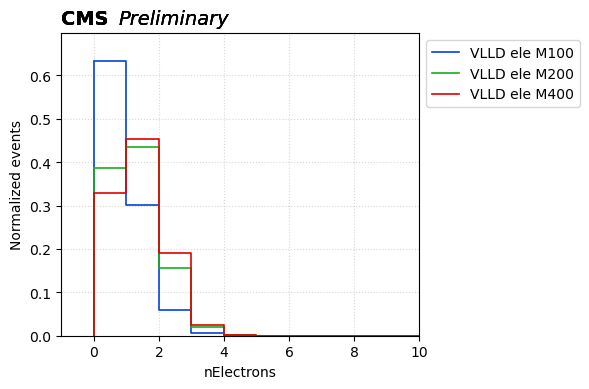

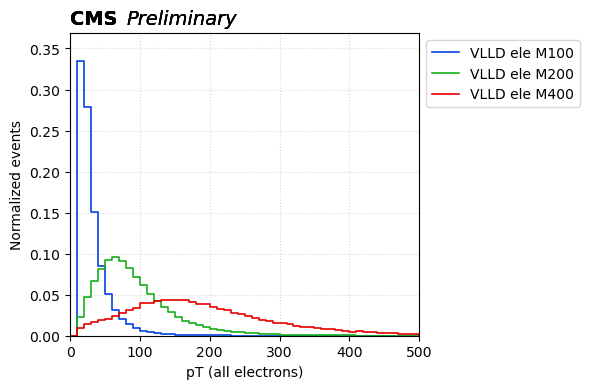

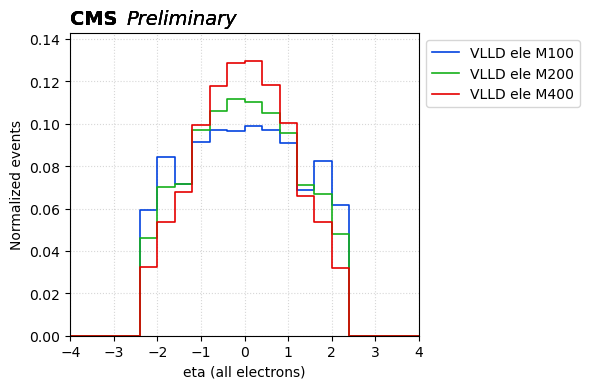

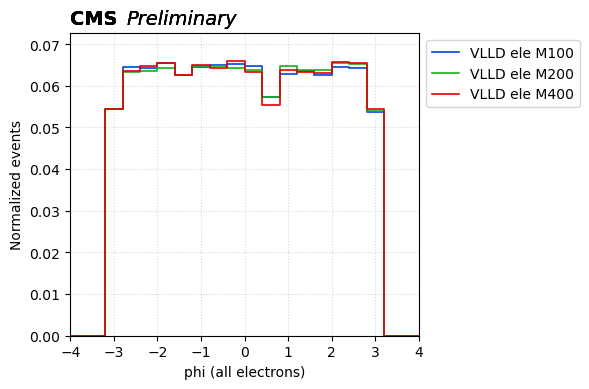

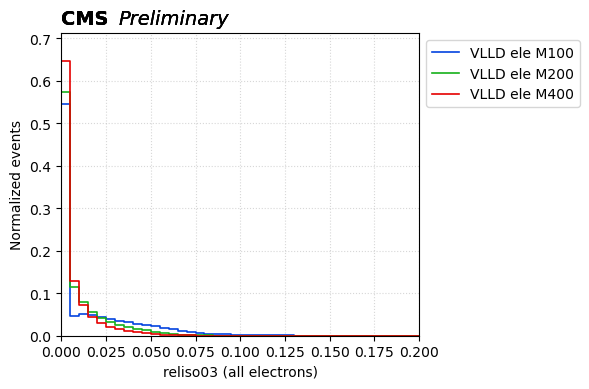

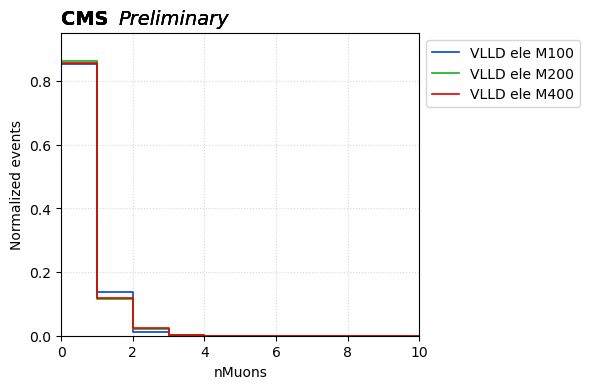

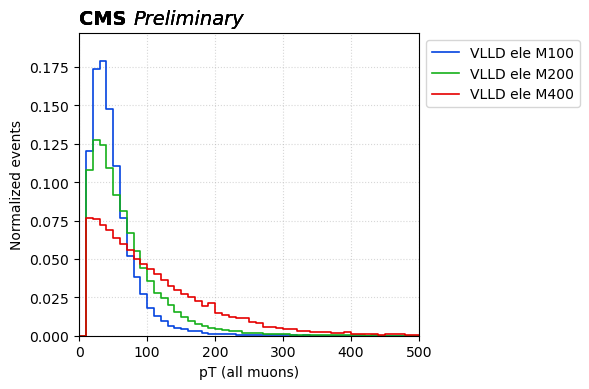

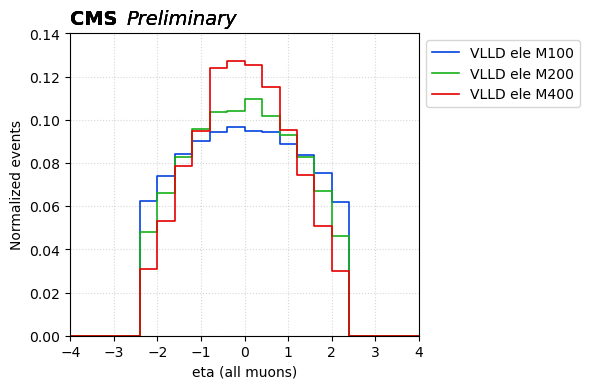

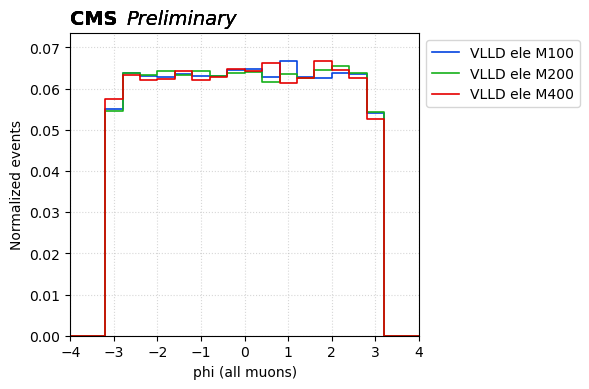

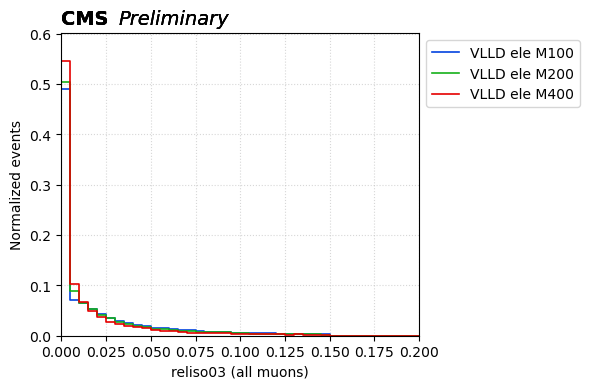

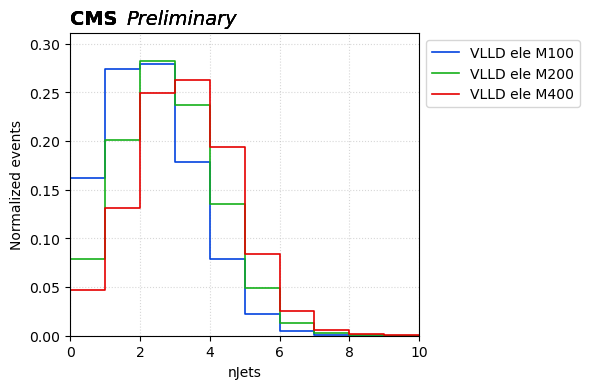

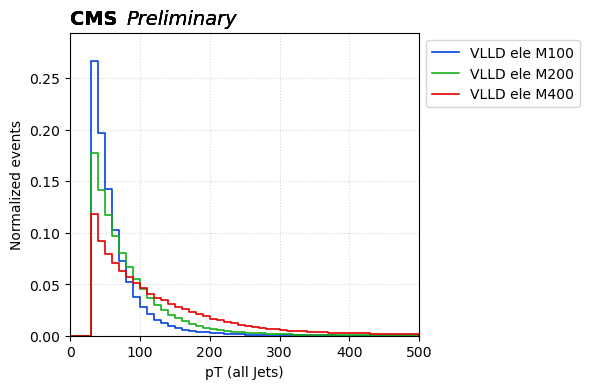

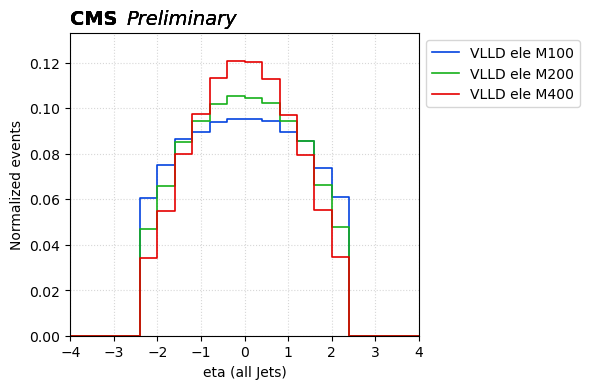

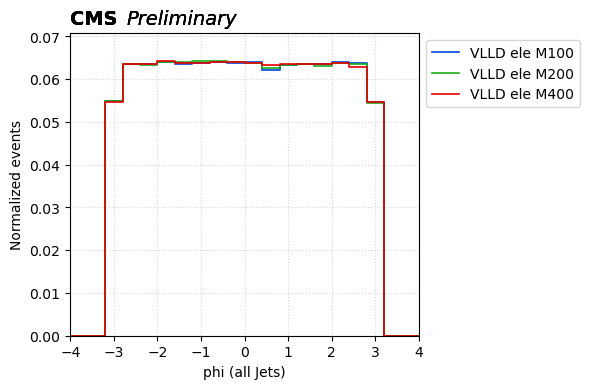

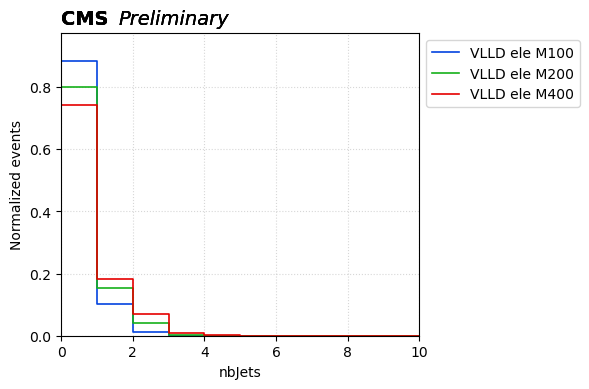

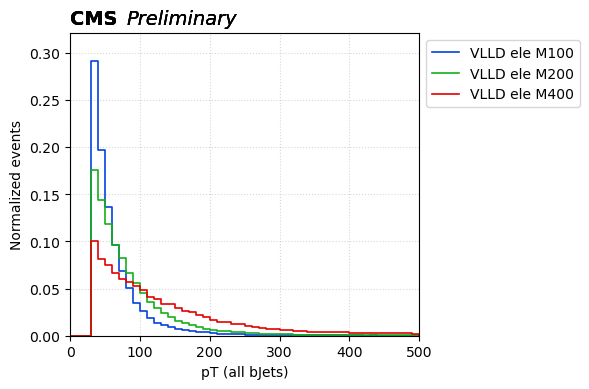

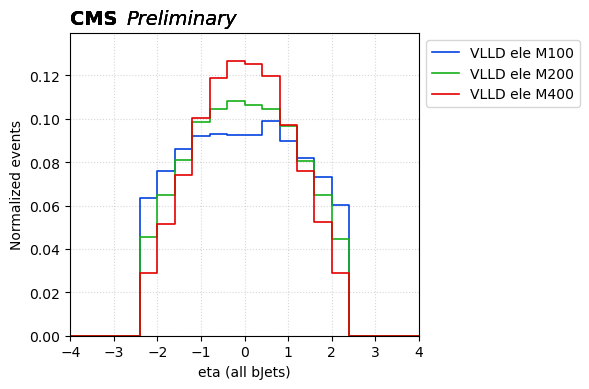

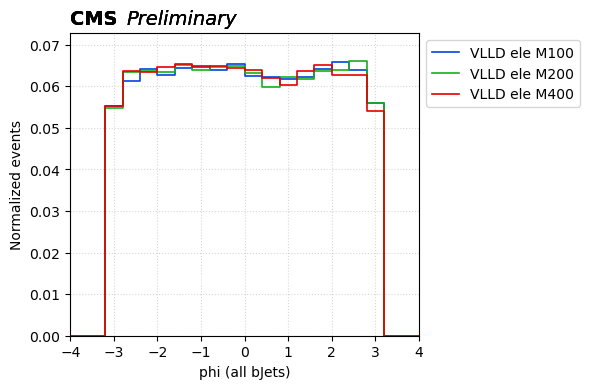

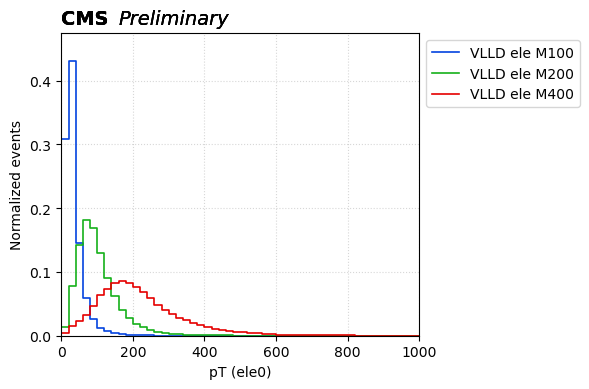

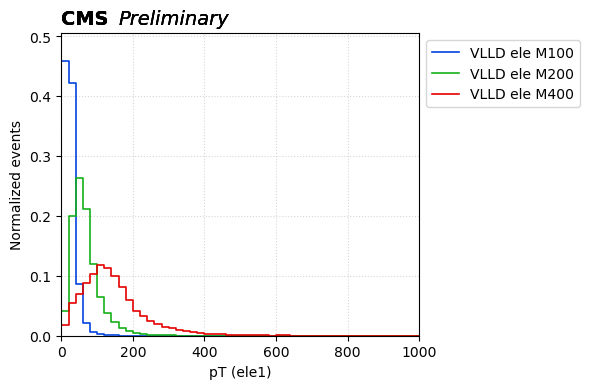

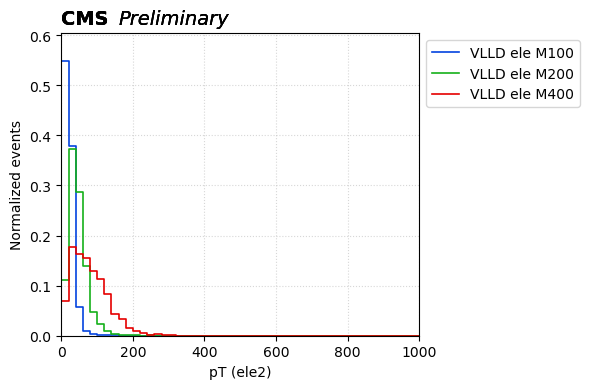

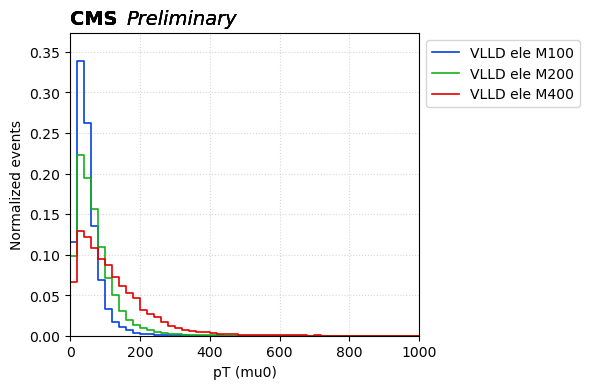

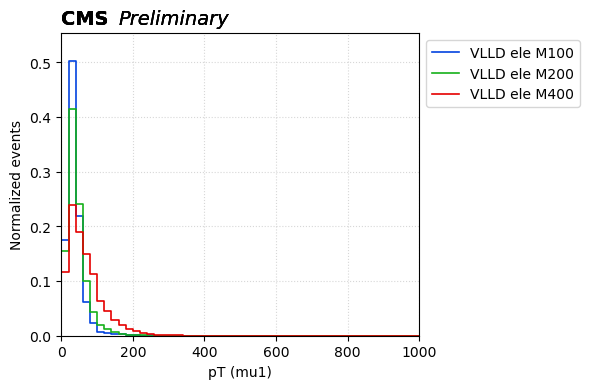

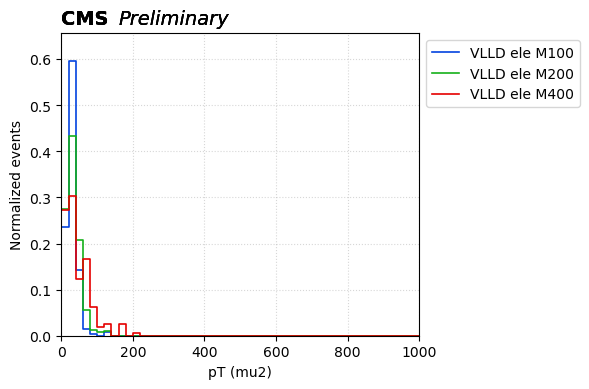

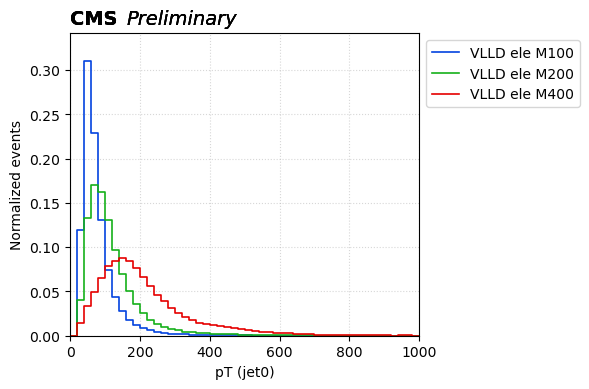

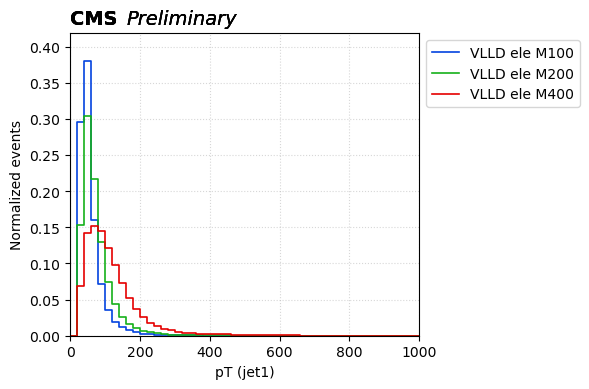

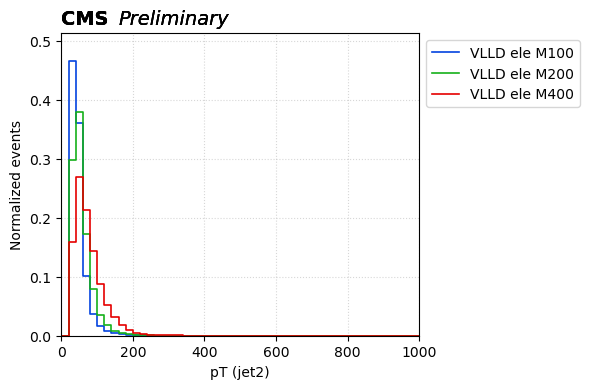

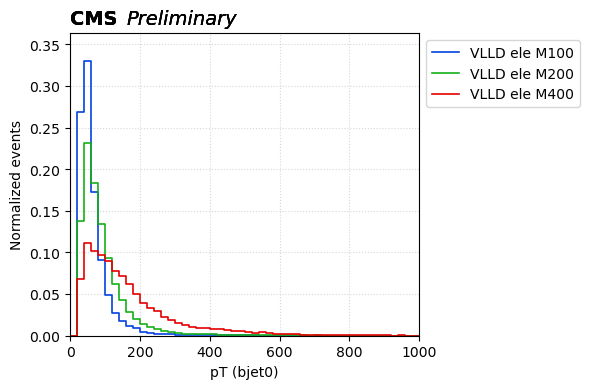

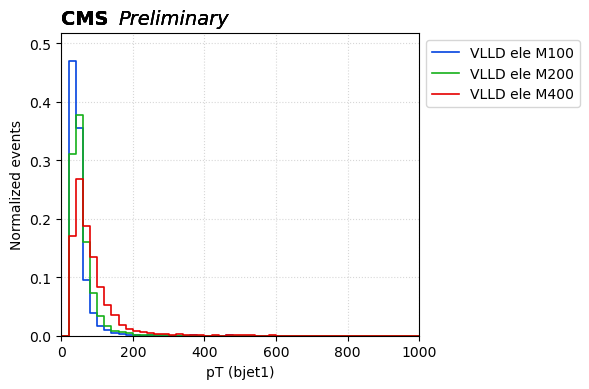

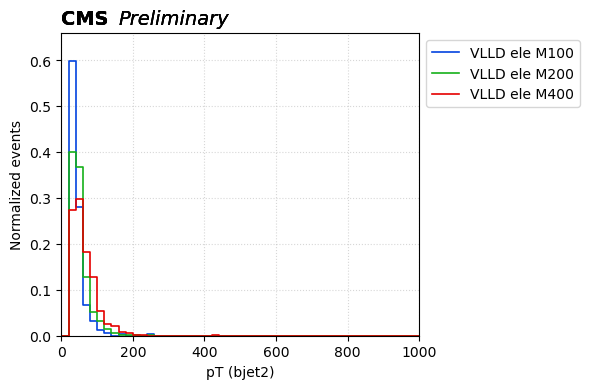

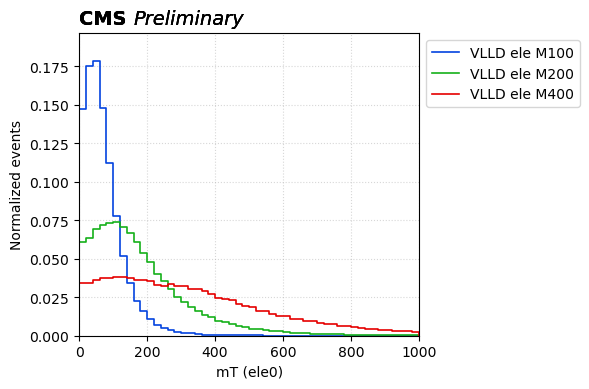

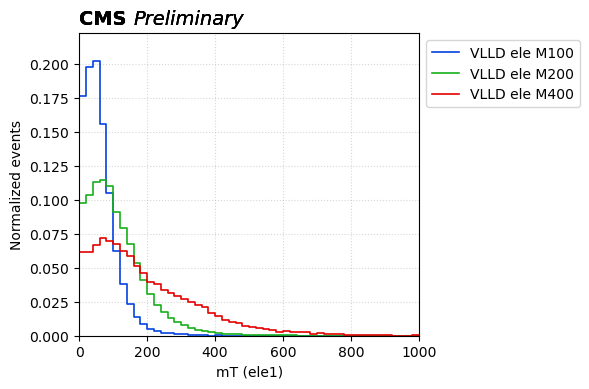

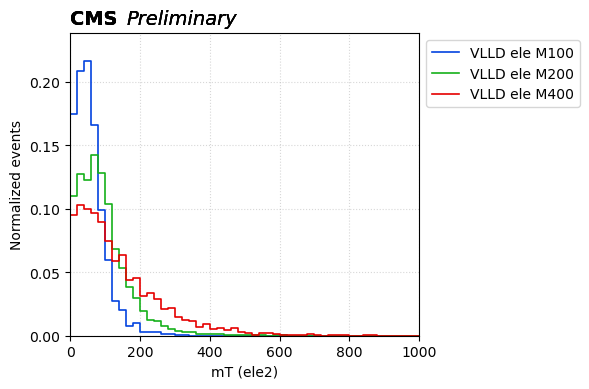

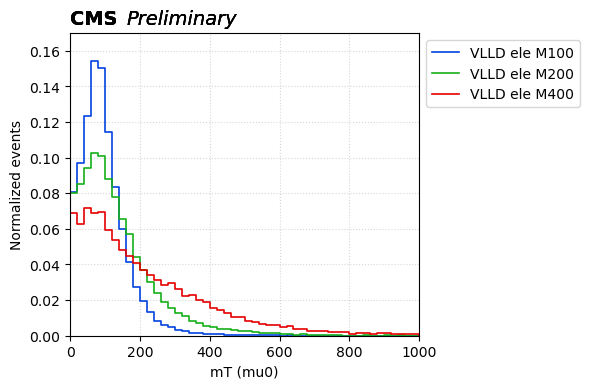

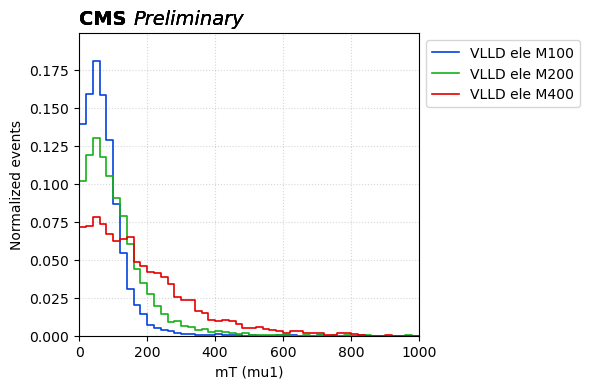

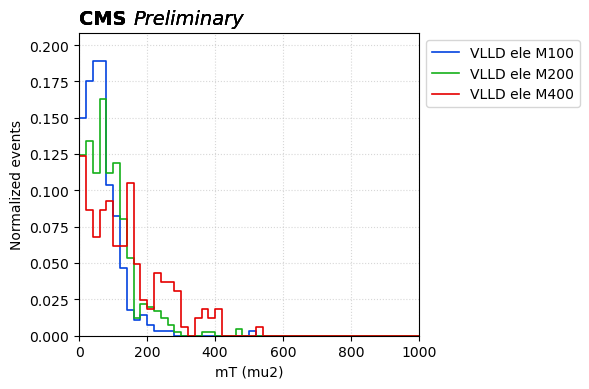

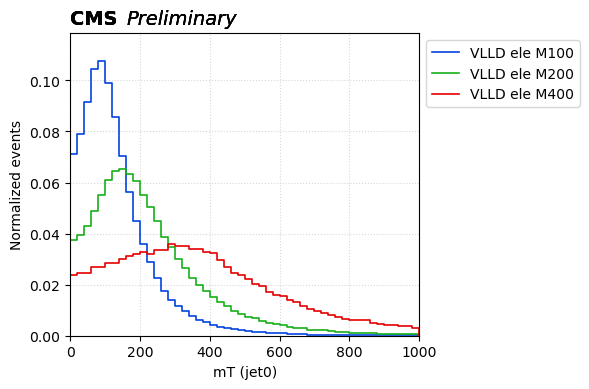

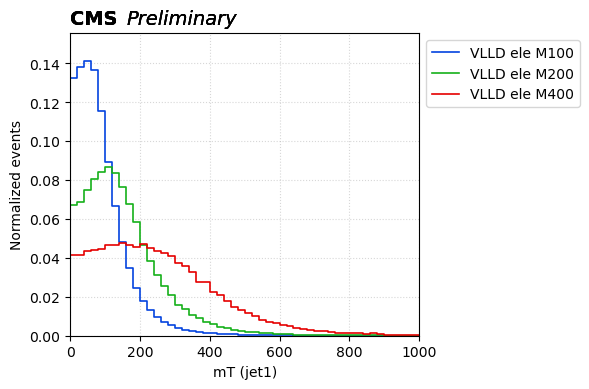

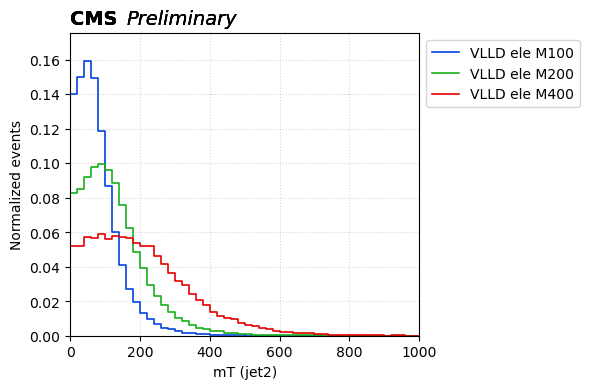

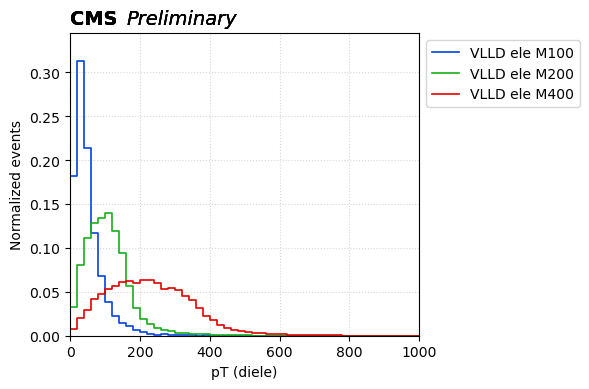

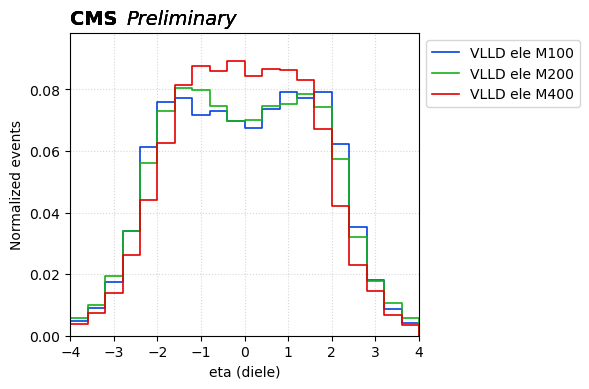

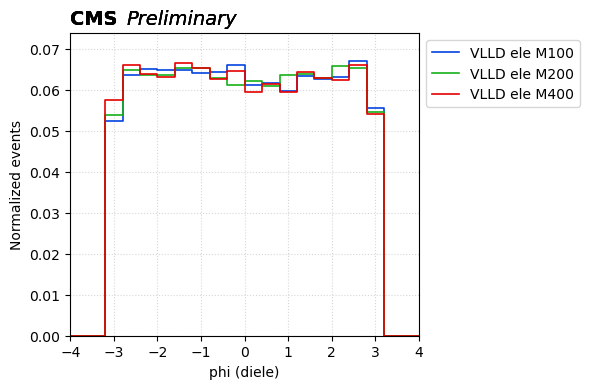

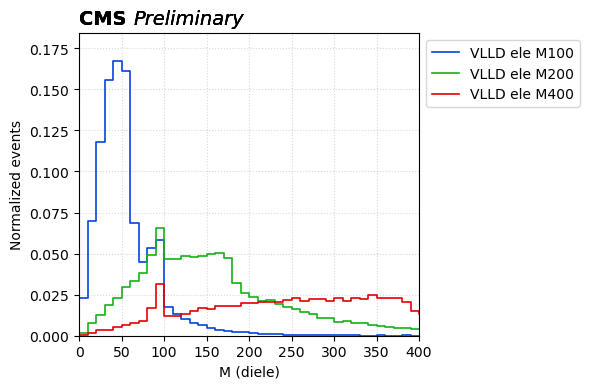

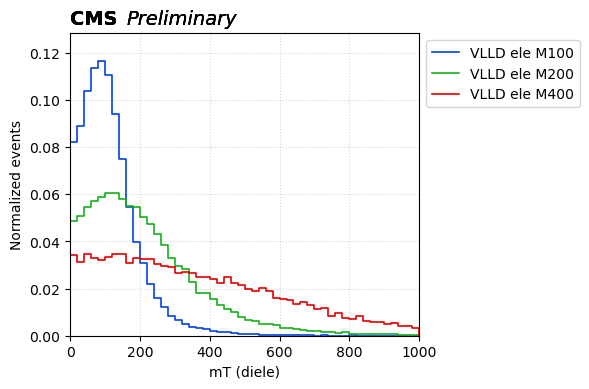

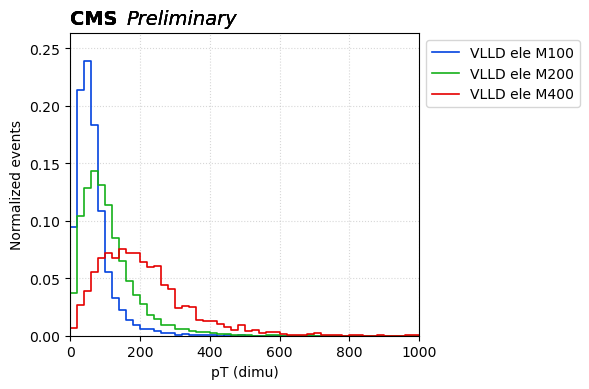

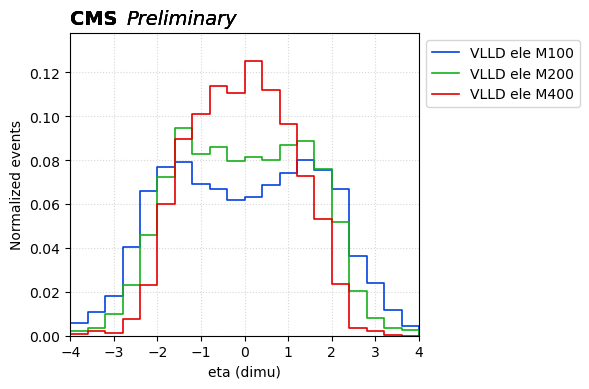

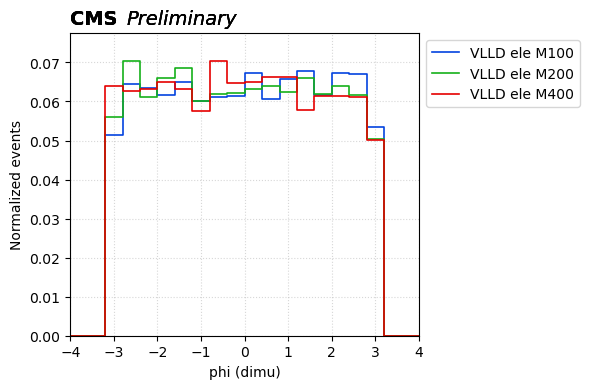

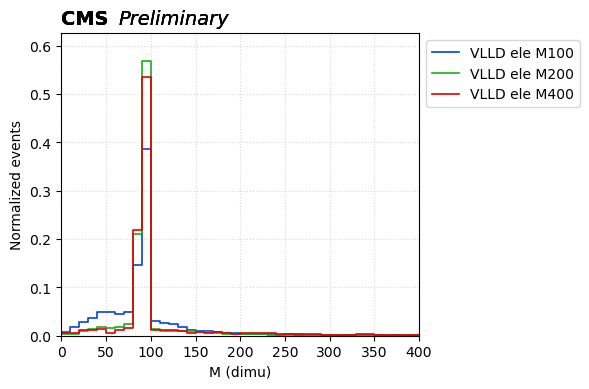

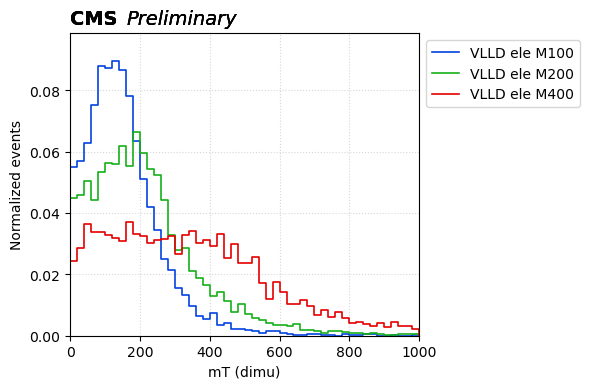

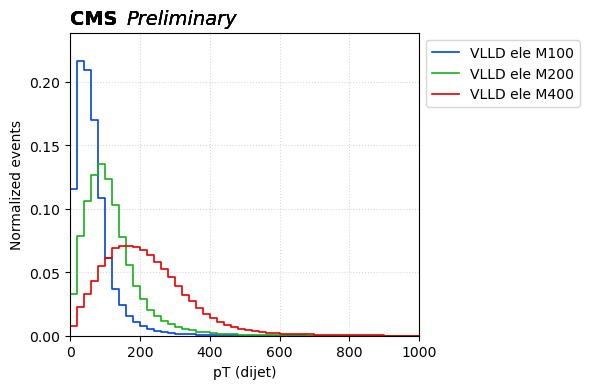

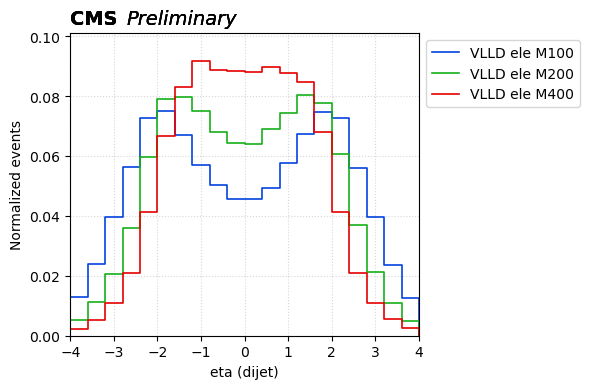

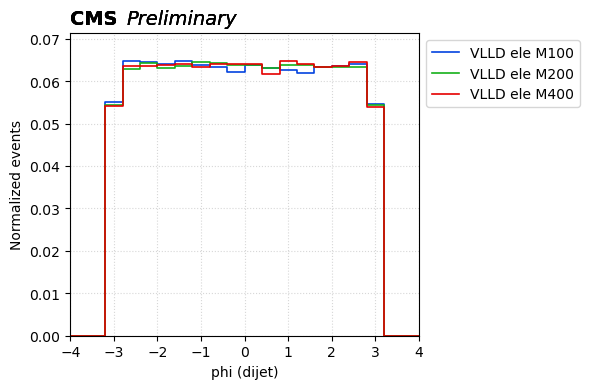

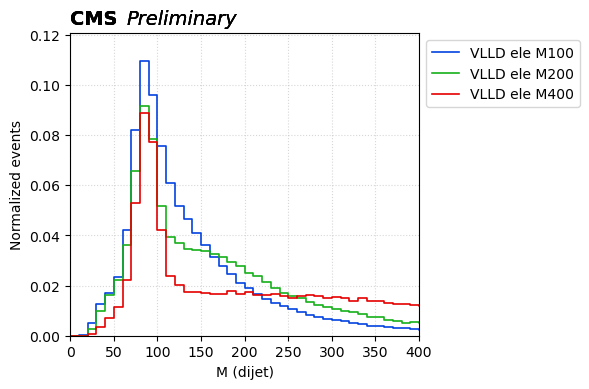

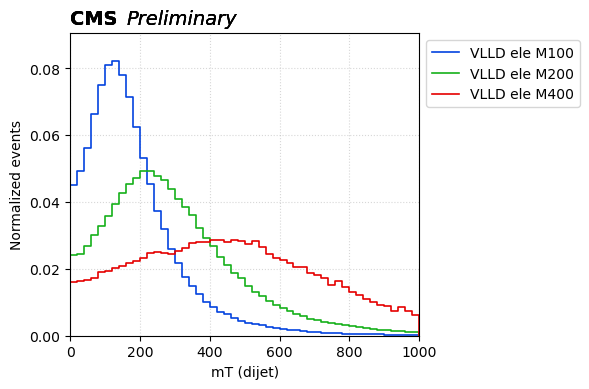

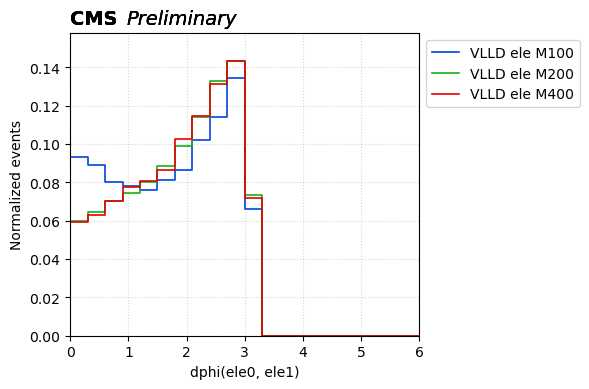

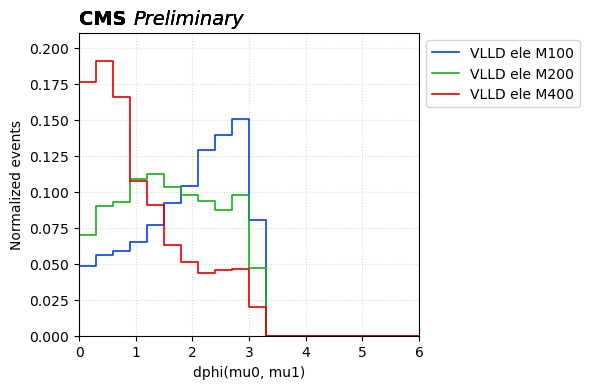

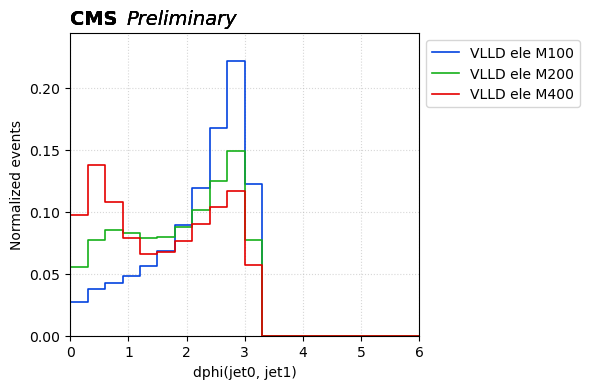

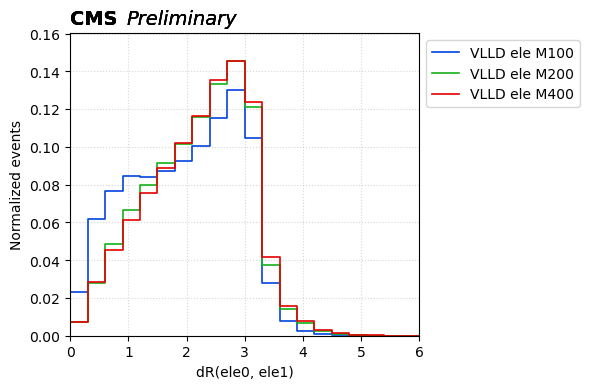

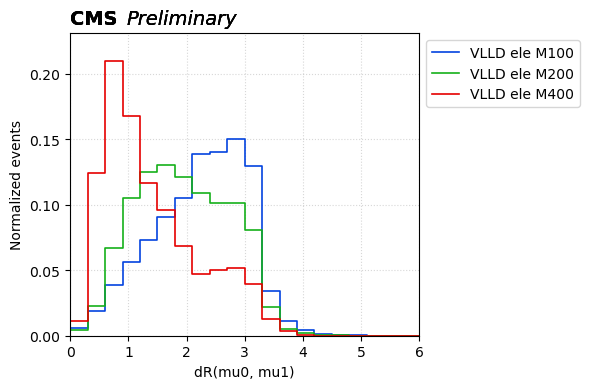

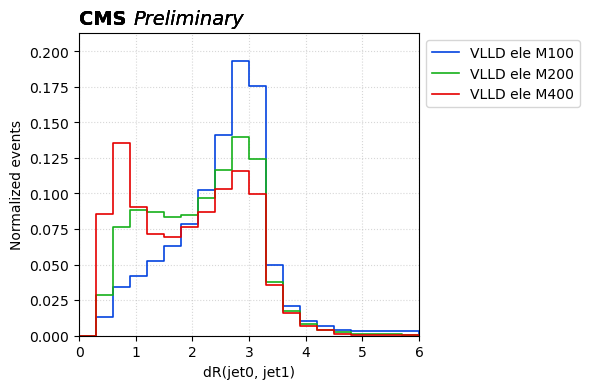

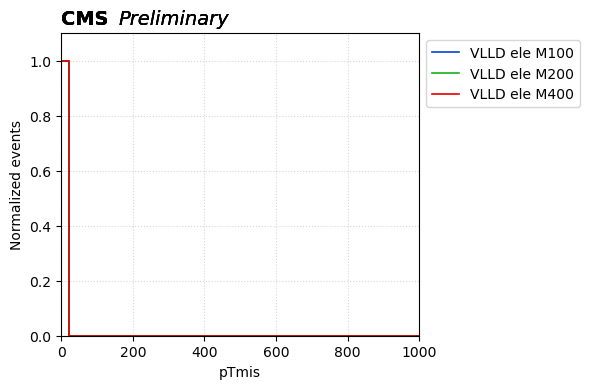

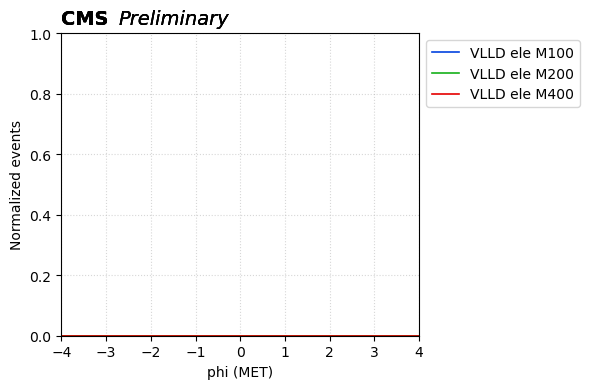

Done!


In [7]:
for plot_name, settings in plotdict.items():
    # Plot histograms using Matplotlib
    fig, ax = plt.subplots(figsize=(6, 4))
    ymax = 0

    for file_name, attrs in filedict.items():
        if plot_name in attrs['hist']:
            x, y = attrs['hist'][plot_name]
            label_ = file_name.split('_')[1] + ' ' +file_name.split('_')[2]+' '+ file_name.split('_')[3].split('.')[0]
            lw_ = 1.2
            
            #Fixing the first bin (because it starts halfway), and the last bin (which ends halfway):
            binw = x[1]-x[0]
            x = np.concatenate([[x[0] - binw / 2], x, [x[-1] + binw / 2]])
            y = np.concatenate([[y[0]], y, [y[-1]]])
            
            ax.step(x, y, where='mid', label=label_, color=attrs['color'], linewidth=lw_)
            # Drawing vertical lines at the edges to mimic a ROOT histogram
            ax.vlines(x[0],  0,  y[0], color=attrs['color'], linestyle='-', linewidth=lw_)
            ax.vlines(x[-1], 0, y[-1], color=attrs['color'], linestyle='-', linewidth=lw_)
            ymax = max(ymax, y.max())

        ax.set_xlabel(attrs['xlabels'][plot_name], fontsize=10)
        ax.set_ylabel('Normalized events', fontsize=10)
        ax.set_xlim(settings['xlim'])
        ax.set_ylim(0, ymax * 1.1 if ymax > 0 else 1)
        ax.legend(loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))
        ax.grid(True, linestyle=':', alpha=0.5)
        ax.text(0, 1.03, "CMS", transform=ax.transAxes, fontsize=14, fontweight='bold')
        ax.text(0.16, 1.03, "Preliminary", transform=ax.transAxes, fontsize=14, fontstyle='italic')
    
    plt.tight_layout()
    plt.savefig(f"{plotdir}/{plot_name}.png")
    plt.show()
    #break
    #plt.close()

print('Done!')

In [8]:
print('Done!')

Done!
